# Luokittelu - päätöspuu

Klassinen esimerkki luokittelusta on kurjenmiekkojen (iris) luokittelu kolmeen lajiin (setosa, versicolor, virginica) terä- (petal) ja verholehtien (sepal) koon mukaan. Seuraavassa käytän luokitteluun päätöspuuta.

<h3>Päästöspuu-menetelmän idea</h3>

Päätöspuumenetelmälle annetaan parametrina puun syvyys (kuinka monta haarautumista enimmillään?).

Jokaisessa haarautumisessa algoritmi valitsee parhaiten erottelevan selittävän muuttujan ja siihen liittyvän rajakohdan.

Gini = millä todennäköisyydellä tehdään väärä luokittelu? Toimivassa päätöspuussa on haarautumisten jälkeen vain pieniä gini-arvoja.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Esimerkkidata löytyy seaborn-kirjastosta:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


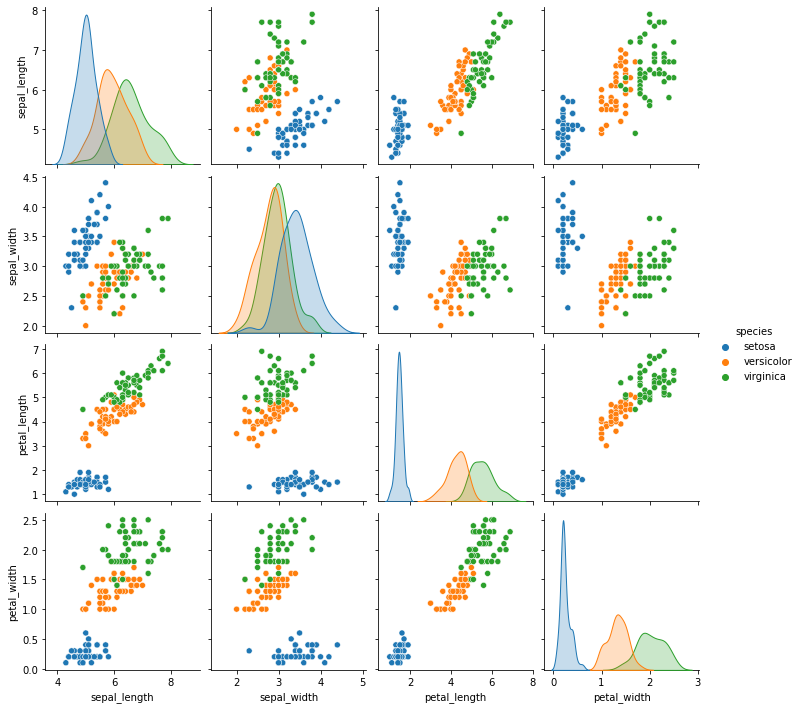

In [3]:
# Seaborn-kirjaston pairplot havainnollistaa hyvin lajin (species) riippuvuutta petal- ja sepal-mitoista:
sns.pairplot(iris, hue = 'species')

In [4]:
# Feature-matriisi on iris-data ilman species-muuttujaa:
X = iris.drop('species', axis = 1)

# Target on species (laji)
y = iris['species']

In [5]:
# train_test_split jakaa datan opetusdataan ja testidataan (25 % datasta, jolloin toisin määrätä).
# random_state määrittää satunnaislukugeneraattorin siemenluvun. Sama siemenluku takaa saman jaottelun
# eri suorituskerroilla.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [6]:
# Päätöspuumallin tuonti:
from sklearn import tree

# Parametrilla max_depth määrätään päätöspuun maksimi syvyys.
malli = tree.DecisionTreeClassifier(max_depth = 4)
malli.fit(X_train, y_train)

# Mallin mukaisten ennusteiden laskeminen opetusdatalle ja testidatalle:
y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)

In [7]:
# Oikeaan osuneiden ennusteiden osuus opetusdatassa:

from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_train_malli))

0.9910714285714286


In [8]:
# Oikeaan osuneiden ennusteiden osuus testidatassa:

print(accuracy_score(y_test, y_test_malli))

0.8947368421052632


In [9]:
# Confusion-matriisi opetusdatalle:

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_malli))

[[38  0  0]
 [ 0 36  0]
 [ 0  1 37]]


In [10]:
# Confusion-matriisi testidatalle:

print(confusion_matrix(y_test, y_test_malli))

[[12  0  0]
 [ 0 12  2]
 [ 0  2 10]]


[Text(401.76000000000005, 489.24, 'X[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [38, 36, 38]'),
 Text(200.88000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(602.6400000000001, 380.52000000000004, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 36, 38]'),
 Text(401.76000000000005, 271.8, 'X[0] <= 4.95\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(200.88000000000002, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(602.6400000000001, 163.08000000000004, 'X[0] <= 7.05\ngini = 0.1\nsamples = 38\nvalue = [0, 36, 2]'),
 Text(401.76000000000005, 54.360000000000014, 'gini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(803.5200000000001, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(803.5200000000001, 271.8, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

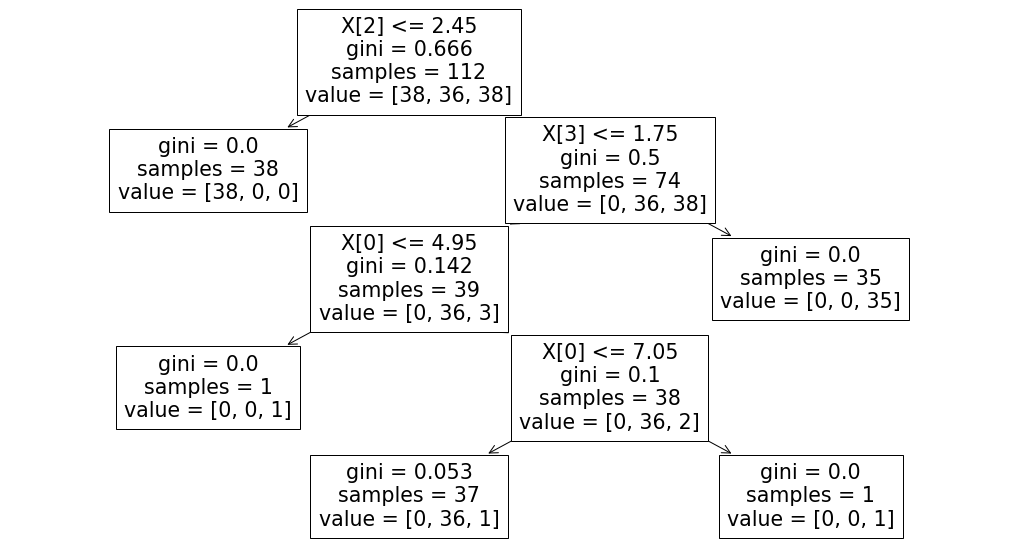

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18, 10))
plot_tree(malli)

Ensimmäinen haarautuminen tehdään petal_length-muuttujan perusteella. Jos petal_length on pienempi tai yhtäsuuri kuin 2,45, niin havainto luokitellaan setosaksi (38 kpl, gini=0). Jäljelle jää 36 versicoloria ja 38 virginicaa (gini=0,5). Jos ajat koodin uudelleen, niin ensimmäinen haarautuminen voi toteutua myös petal_width-muuttujan perusteella, mutta johtaa samaan tulokseen.

Seuraava jako tehdään petal_width-muuttujan arvon 1,75 kohdalta. Toiseen haaraan jää 36 versicoloria ja 3 virginicaa (gini=0,142) ja toiseen haaraan 35 virginicaa (gini=0) jne.

In [12]:
# Uusi data, jota ei ole valmiiksi luokiteltu:
Xnew = pd.read_excel('http://taanila.fi/irisnew.xlsx')
Xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.5,1.5,0.3
1,8.1,3.3,6.5,1.9
2,6.0,3.0,3.0,0.5


In [13]:
# Luokittelu:
malli.predict(Xnew)

array(['setosa', 'virginica', 'versicolor'], dtype=object)